In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df['target'].value_counts()

,count
target,
1,165
0,138


# EDA

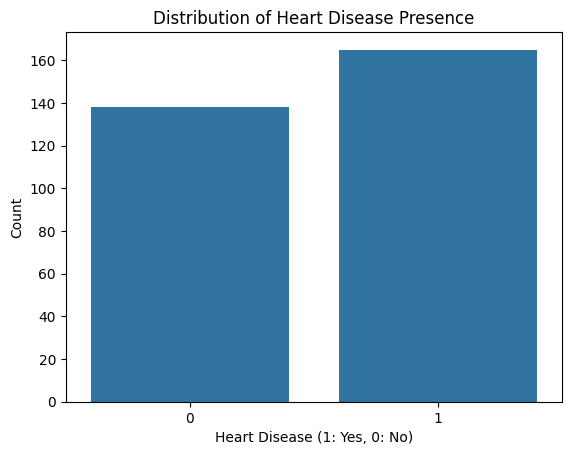

In [8]:
# Bar plot for target variable (Heart Disease presence)
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease Presence')
plt.xlabel('Heart Disease (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

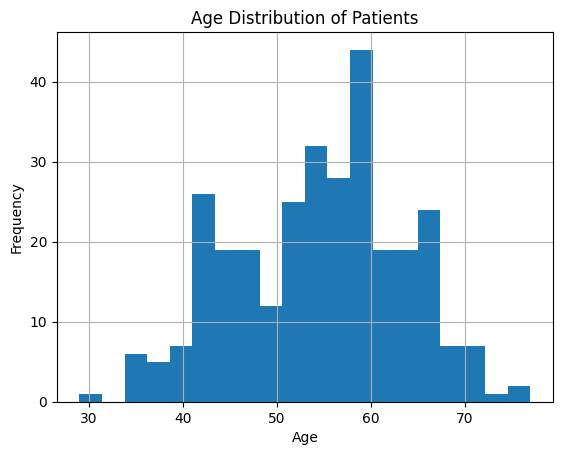

In [9]:
# Histogram for age distribution
df['age'].hist(bins=20)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


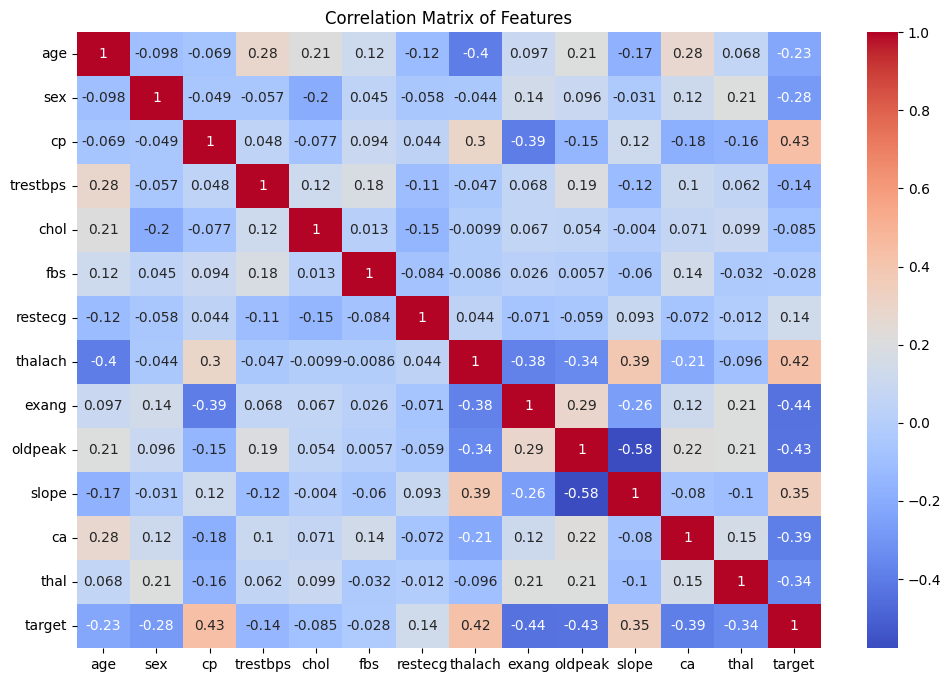

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()
print(df.corr())


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

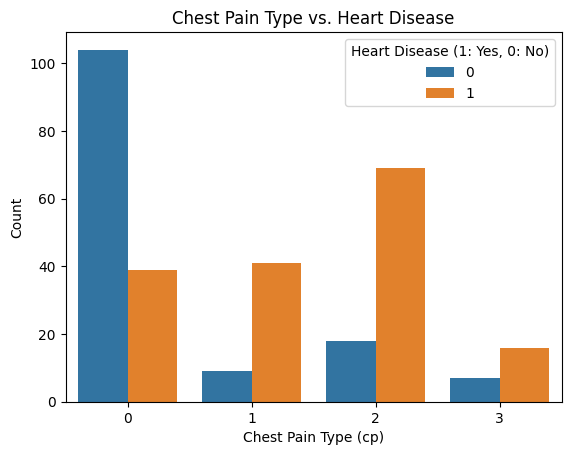

In [11]:
# Chest pain type vs. target
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.legend(title='Heart Disease (1: Yes, 0: No)')
plt.show()


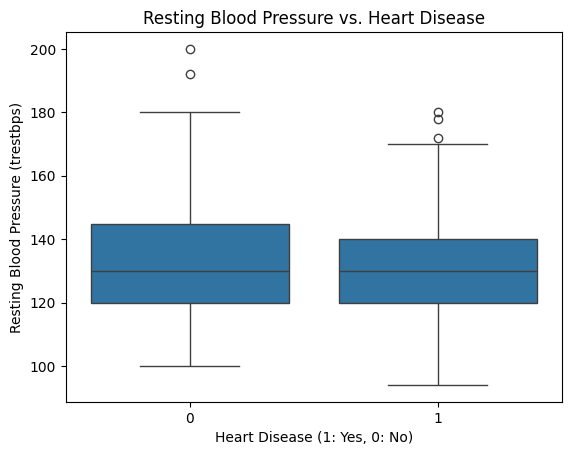

In [12]:
# Box plot for trestbps vs. target
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure vs. Heart Disease')
plt.xlabel('Heart Disease (1: Yes, 0: No)')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()


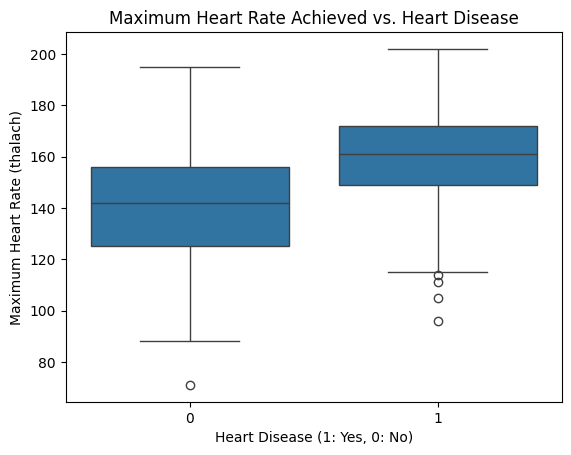

In [13]:
# Box plot for thalach vs. target
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Maximum Heart Rate Achieved vs. Heart Disease')
plt.xlabel('Heart Disease (1: Yes, 0: No)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()


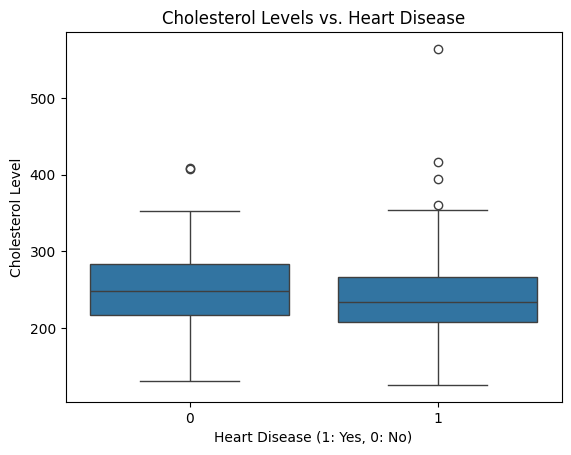

In [14]:
# Box plot for cholesterol levels
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels vs. Heart Disease')
plt.xlabel('Heart Disease (1: Yes, 0: No)')
plt.ylabel('Cholesterol Level')
plt.show()


# Insight

1. average blood sugar level (160 for diabetics vs. 138 for non-diabetics) suggests a significant difference in diabetes prevalence among heart disease patients.
2. Age distribution indicates that individuals around 60 years old have the highest incidence of heart disease.
3. The correlation analysis reveals that the presence of heart disease is most strongly associated with chest pain type (cp) and maximum heart rate (thalach).
4. Type 2 chest pain (cp=2) is linked to a higher likelihood of heart disease.
5. Patients with heart disease tend to have higher resting blood pressure compared to those without.
6. In contrast, patients with heart disease exhibit a higher maximum heart rate than non-heart disease patients.

# Building the model

In [25]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled dataset
best_model.fit(X_resampled, y_resampled)

# Re-evaluate the model
y_pred_resampled = best_model.predict(X_test)
print("Classification Report after SMOTE:")
print(classification_report(y_test, y_pred_resampled))


Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [28]:
df3 = df.copy()

X = df3.drop('target', axis=1)
y = df3['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the individual classifiers
log_reg = LogisticRegression(random_state=42)
svc = SVC(probability=True, random_state=42)  # Set probability=True for soft voting
knn = KNeighborsClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create a Voting Classifier (Soft Voting)
voting_classifier = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('svc', svc),
        ('knn', knn),
        ('xgb', xgb),
        ('gb', gb)
    ],
    voting='soft'  # Use 'soft' voting for better performance with probability estimates
)

# Fit the model
voting_classifier.fit(X_train, y_train)


# Cross-validation score
cv_scores = cross_val_score(voting_classifier, X_train, y_train, cv=5)
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-

Mean CV Score: 0.8016156462585033
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Making a predictive system

In [43]:
# Input Data
input_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1],
                       [37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2]])

# Scale the input data
input_data_scaled = scaler.transform(input_data)

# Make predictions
predictions = voting_classifier.predict(input_data_scaled)

# Print the predictions
print(predictions)  # Output: array([1, 1]) or array([0, 0]) depending on the model's predictions




[1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Saving the model

In [44]:
from joblib import dump

# Save the model
dump(voting_classifier, 'heart-disease_save.joblib')


['heart-disease_save.joblib']

In [45]:
import pickle

# Save the model
with open('heart-disease_save.pkl', 'wb') as file:
    pickle.dump(voting_classifier, file)
